In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# load data
data = pd.read_csv('data/combineVle.csv')
data.shape

(25843, 19)

In [3]:
data.rename(columns={'total_score*weight':'total_score'}, inplace=True)
# when relevant columns have null value, drop null
columns_to_drop=["age_band", "highest_education", "imd_band", "module_presentation", "total_score", "total_click"]
data = data.dropna(subset=columns_to_drop, axis=0)
data.shape

(24845, 19)

In [4]:
# process data, change string to integer
# change age_band
data["age_band"] = data["age_band"].map({"0-35":1, "35-55":2, "55<=":3})

# preprocess "edu" column
data["highest_education"] = data["highest_education"] .map({"No Formal quals":0, "Lower Than A Level":1, "A Level or Equivalent":2, "HE Qualification":3, "Post Graduate Qualification":4})

# change imd_band 
data["imd_band"] = data["imd_band"].map({"0-10%":0, "10-20%":1, "20-30%":2, "30-40%":3, "40-50%":4, "50-60%":5, "60-70%":6, "70-80%":7, "80-90%":8, "90-100%":9})

# change module_presentation
change={"AAA_2013J":1, "AAA_2014J":2, "BBB_2013B":3, "BBB_2013J":4, "BBB_2014B":5, "BBB_2014J":6, "CCC_2014B":7, "CCC_2014J":8,\
        "DDD_2013B":9, "DDD_2013J":10, "DDD_2014B":11, "DDD_2014J":12, "EEE_2013J":13, "EEE_2014B":14, "EEE_2014J":15,\
        "FFF_2013B":16, "FFF_2013J":17, "FFF_2014B":18, "FFF_2014J":19, "GGG_2013J":20, "GGG_2014B":21, "GGG_2014J":22}
data["module_presentation"] = data["module_presentation"].map(change)

# change final_result, don't need to transfer
# data["final_result"] = data["final_result"].map({"Withdrawn":0,  "Fail":0,  "Pass":1, "Distinction":1})
data.shape

(24845, 19)

In [5]:
extracted_data=data[['imd_band', 'age_band', 'highest_education', 'module_presentation', 'total_click']]
extracted_data.head()

,imd_band,age_band,highest_education,module_presentation,total_click
0,8,3,3,2,2791.0
1,3,3,3,10,646.0
2,3,3,3,12,10.0
3,9,3,3,1,934.0
4,2,1,1,3,161.0


In [6]:
# K-Means clustering
km = KMeans(n_clusters=3,init = 'k-means++')
y_predicted = km.fit_predict(extracted_data)

# Assign cluster labels to train data
data['cluster'] = y_predicted
y_predicted

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, ..., 2, 0, 0], dtype=int32)

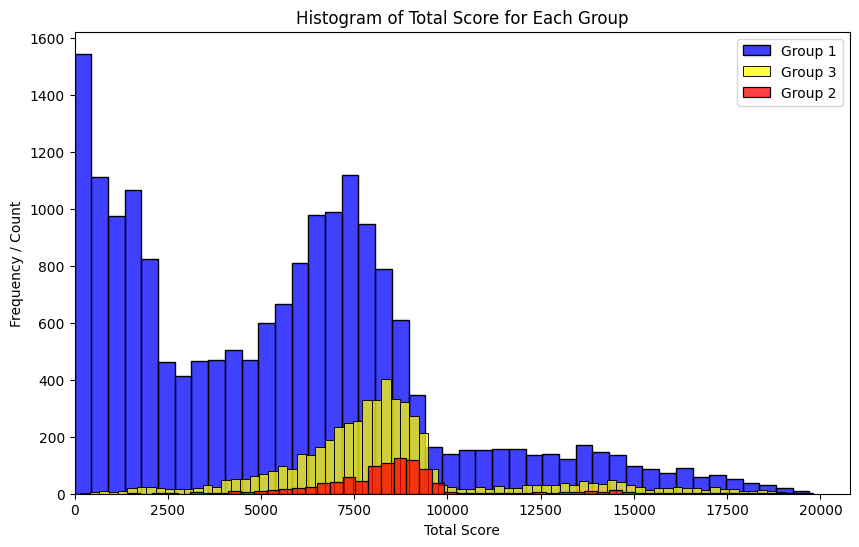

In [8]:
df1 = data[data['cluster']==0]
df2 = data[data['cluster']==1]
df3 = data[data['cluster']==2]

fig = plt.figure(figsize=(10,6))

sns.histplot(df1['total_score'], color='blue', label='Group 1')
sns.histplot(df3['total_score'], color='yellow', label='Group 3')
sns.histplot(df2['total_score'], color='red', label='Group 2')

plt.legend()
plt.xlabel('Total Score')
plt.ylabel('Frequency / Count')
plt.title('Histogram of Total Score for Each Group')

plt.xlim(left=0)  # Adjust the x-axis limit to include 0
plt.ylim(bottom=0)  # Adjust the y-axis limit to include 0

plt.show()

In [9]:
pd.DataFrame(data).to_csv("data/groupeddata.csv")

# Random forest
based on grouped data by K-Means clustering
cluster=0 in the middle, means pass
cluster=1 in the left means fail
cluster=2 in the right means distinction

In [10]:
# load data
df = pd.read_csv('data/groupeddata.csv')
df.shape

(24845, 21)

In [11]:
# only keep relevant columns
df = df[['total_score','gender','highest_education','imd_band','age_band','num_of_prev_attempts',\
         'studied_credits','disability','final_result','module_presentation','total_click','cluster']].copy()
df

,total_score,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,total_click,cluster
0,6350.0,M,3,8,3,0,60,N,Pass,2,2791.0,2
1,3490.0,M,3,3,3,0,90,N,Withdrawn,10,646.0,0
2,4300.0,M,3,3,3,1,60,N,Withdrawn,12,10.0,0
3,8240.0,M,3,9,3,0,240,N,Pass,1,934.0,0
4,1669.0,F,1,2,1,2,60,N,Fail,3,161.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24840,6940.0,M,1,6,1,0,120,N,Pass,1,758.0,0
24841,937.0,M,1,5,1,0,60,N,Withdrawn,7,786.0,0
24842,5344.0,M,1,5,1,0,60,N,Pass,13,3455.0,2
24843,5580.0,F,1,5,2,0,60,N,Fail,6,717.0,0


In [13]:
# # process data, change string to integer

# change final_result
df["final_result"] = df["final_result"].map({"Withdrawn":0,  "Fail":0,  "Pass":1, "Distinction":1})

# change gender
df["gender"] = df["gender"].map({"M":1, "F":0})

#change disability
df["disability"] = df["disability"].map({"N":0, "Y":1})
df

,total_score,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,total_click,cluster
0,6350.0,1,3,8,3,0,60,0,1,2,2791.0,2
1,3490.0,1,3,3,3,0,90,0,0,10,646.0,0
2,4300.0,1,3,3,3,1,60,0,0,12,10.0,0
3,8240.0,1,3,9,3,0,240,0,1,1,934.0,0
4,1669.0,0,1,2,1,2,60,0,0,3,161.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24840,6940.0,1,1,6,1,0,120,0,1,1,758.0,0
24841,937.0,1,1,5,1,0,60,0,0,7,786.0,0
24842,5344.0,1,1,5,1,0,60,0,1,13,3455.0,2
24843,5580.0,0,1,5,2,0,60,0,0,6,717.0,0


In [12]:
# drop null
df.dropna(inplace=True)
df.shape

(24845, 12)

In [14]:
# define Random forest
def randomforest(data):
    # dividing data to train data and test data
    train_df, test_df = np.split(data.sample(frac=1, random_state=1729), [int(0.8 * len(data))])
    print(train_df.shape, test_df.shape)
    # random forecast
    features = list(train_df.columns)
    label = "final_result"  # target label
    compare_label = "total_score"
        
    print("Building training and testing datasets")
    print()
        
    X_train = train_df.drop(columns=[label, compare_label], axis=1)
    y_train = train_df[label]
    # when testing model, need to drop total_score and final_result, cause they are similar
    X_test = test_df.drop(columns=[label, compare_label], axis=1)
    y_test = test_df[label]

    print('Column order: ')
    print(features)
    print()
        
    print("Label column is: ",label)
    print()
        
    print("Data Shape: ")
    print()
    print("---- SHAPE OF TRAINING DATA (80%) ----")
    print(X_train.shape)
    print(y_train.shape)
    print()
    print("---- SHAPE OF TESTING DATA (20%) ----")
    print(X_test.shape)
    print(y_test.shape)
    print()
        
    
    print("Training RandomForest Model.....")
    print()
    n_estimators=100
    # max_features=5
    model =  RandomForestClassifier(n_estimators=n_estimators, verbose = 3,n_jobs=-1)
    model.fit(X_train, y_train)
    print()
    # cluster == 1, predict should be 0  
    y_pred_test = model.predict(X_test)
    X_test['predict'] = y_pred_test
    test_acc = accuracy_score(y_test,y_pred_test)
    test_rep = classification_report(y_test,y_pred_test)

    print()
    print("---- METRICS RESULTS FOR TESTING DATA ----")
    print()
    print("Total Rows are: ", X_test.shape[0])
    print('[TESTING] Model Accuracy is: ', test_acc)
    print('[TESTING] Testing Report: ')
    print(test_rep)

    # Tree Visualisation
    from sklearn.tree import export_graphviz
    import graphviz
    # from sklearn import tree
    # import matplotlib.pyplot as plt

    # Export the first three decision trees from the forest
    rf = model
    cn=['Withdrawn', 'Fail', 'Pass', 'Distinction']
    for i in range(3):
        tree = rf.estimators_[i]
        dot_data = export_graphviz(tree,
                                feature_names=X_train.columns,  
                                class_names=cn,
                                filled=True,  
                                max_depth=2, 
                                impurity=False, 
                                proportion=True)
        graph = graphviz.Source(dot_data)
        print("******graph******")
        print(graph)

In [15]:
df1 = df[df['cluster']==0]
df2 = df[df['cluster']==1]
df3 = df[df['cluster']==2]
print(df1.shape, df2.shape, df3.shape)

(18555, 12) (969, 12) (5321, 12)


In [16]:
randomforest(df1)

(14844, 12) (3711, 12)
Building training and testing datasets

Column order: 
['total_score', 'gender', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'module_presentation', 'total_click', 'cluster']

Label column is:  final_result

Data Shape: 

---- SHAPE OF TRAINING DATA (80%) ----
(14844, 10)
(14844,)

---- SHAPE OF TESTING DATA (20%) ----
(3711, 10)
(3711,)

Training RandomForest Model.....

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building t

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 57 of 100building tree 58 of 100

building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [17]:
randomforest(df2)

(775, 12) (194, 12)
Building training and testing datasets

Column order: 
['total_score', 'gender', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'module_presentation', 'total_click', 'cluster']

Label column is:  final_result

Data Shape: 

---- SHAPE OF TRAINING DATA (80%) ----
(775, 10)
(775,)

---- SHAPE OF TESTING DATA (20%) ----
(194, 10)
(194,)

Training RandomForest Model.....

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [18]:
randomforest(df3)

(4256, 12) (1065, 12)
Building training and testing datasets

Column order: 
['total_score', 'gender', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'module_presentation', 'total_click', 'cluster']

Label column is:  final_result

Data Shape: 

---- SHAPE OF TRAINING DATA (80%) ----
(4256, 10)
(4256,)

---- SHAPE OF TESTING DATA (20%) ----
(1065, 10)
(1065,)

Training RandomForest Model.....

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [19]:
# using random forest without cluster
nonCluster_df = df[['total_score', 'gender','highest_education','imd_band','age_band','num_of_prev_attempts',\
         'studied_credits','disability','final_result','module_presentation','total_click']].copy()
nonCluster_df

,total_score,gender,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation,total_click
0,6350.0,1,3,8,3,0,60,0,1,2,2791.0
1,3490.0,1,3,3,3,0,90,0,0,10,646.0
2,4300.0,1,3,3,3,1,60,0,0,12,10.0
3,8240.0,1,3,9,3,0,240,0,1,1,934.0
4,1669.0,0,1,2,1,2,60,0,0,3,161.0
...,...,...,...,...,...,...,...,...,...,...,...
24840,6940.0,1,1,6,1,0,120,0,1,1,758.0
24841,937.0,1,1,5,1,0,60,0,0,7,786.0
24842,5344.0,1,1,5,1,0,60,0,1,13,3455.0
24843,5580.0,0,1,5,2,0,60,0,0,6,717.0


In [20]:
randomforest(nonCluster_df)

(19876, 11) (4969, 11)
Building training and testing datasets

Column order: 
['total_score', 'gender', 'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'final_result', 'module_presentation', 'total_click']

Label column is:  final_result

Data Shape: 

---- SHAPE OF TRAINING DATA (80%) ----
(19876, 9)
(19876,)

---- SHAPE OF TESTING DATA (20%) ----
(4969, 9)
(4969,)

Training RandomForest Model.....

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.1s


building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


---- METRICS RESULTS FOR TESTING DATA ----

Total Rows are:  4969
[TESTING] Model Accuracy is:  0.7874823908231032
[TESTING] Testing Report: 
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1932
           1       0.80   

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
